In [3]:
import pandas as pd

In [4]:
dat=pd.read_csv("credit_history.csv")
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [5]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [6]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [7]:
dat['years'].fillna(4,inplace=True)

In [8]:
X=dat.drop("default",axis=1)

In [9]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [10]:
X=pd.get_dummies(X)

In [11]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [12]:
y=dat['default']

In [13]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [26]:
#from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200, criterion = 'gini')

In [27]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [28]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6274256144890039

In [30]:
pred = clf.predict(X_train)
combined = pd.DataFrame({ 'Pred': pred,
                            'Actual': y_train })

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(combined['Actual'], combined['Pred'])

0.6324219381977026

In [32]:
#error
1- accuracy_score(combined['Actual'], combined['Pred'])

0.36757806180229735

In [13]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6760493818892891

In [33]:
import graphviz

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

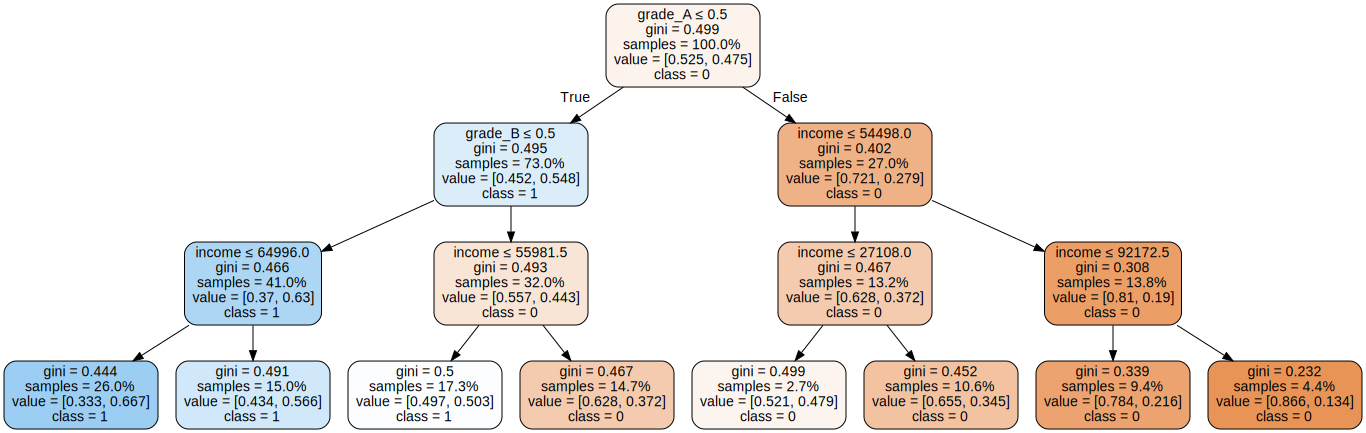

In [35]:
graph = graphviz.Source(dot_data)
graph

### Grid Search-Cross Validation

In [21]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [22]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [23]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [24]:
mod.best_score_

0.6314512214851966